<div style="display:fill;
            border-radius:15px;
            background-color:skyblue;
            font-size:210%;
            letter-spacing:0.5px;
            padding:20px;
            color:white;
            border-style: solid;
            border-color: white;
            text-align:center;">
<b>
    Medical Chatbot / Virtual Assistant 📝

## <font color= maroon> **Purpose**:

The purpose of developing this virtual assitant is to leverage pre-processed and classified medical text data to create an intelligent system capable of providing specialized responses and assistance based on the medical specialty of the input text. <br><br>This system aims to enhance the accessibility of accurate and specialized medical information, support healthcare professionals in retrieeving relevant medical knowledge, and contribute to medical education training.

## <font color= maroon>**Use Cases:**

1. **Healthcare Professional Assistance**:<br> It can assist healthcare professionals in quickly acessing specialty-specific information, guilines, and best practices, thereby supporting clinical decision-making and enhancing patient care.<br><br>

2. **Medical Education and Training**: <br>The chatbot can serve as a valueble learning tool for medical students, residents, and the healthcare professionals by providing specialty-specific knowledge case studies, and educational materials.<br><br>

3. **Information Retrieval**: <br>It can facilitate the efficient retrieval of medical literature, research papers, and clinical trials specific to different medical specialties, aiding in evidence-based practice and research.<br><br>

<div style="font-family: 'Arial', sans-serif; line-height: 1.6;">
    <h2 style="color: maroon; text-align: center;">Contents</h2>
    <h4><a href="#1.0" style="text-decoration: underline;">1.0 Data Scanning</a></h4>
<!--     <ul>
        <li><a href="#1.1" style="text-decoration: underline;">1.1 Import Functions/Load Dataset</a></li>
        <li><a href="#1.2" style="text-decoration: underline;">1.2 Tidy/Explore Dataset</a></li>
        <li><a href="#1.3" style="text-decoration: underline;">1.3 Count of each Medical Speciality</a></li>
        <li><a href="#1.4" style="text-decoration: underline;">1.4 Cleaning of Dataset</a></li>
        <li><a href="#1.5" style="text-decoration: underline;">1.5 Medical Specialty Word Count</a></li>
        <li><a href="#1.6" style="text-decoration: underline;">1.6 Text Complextiy/Readability</a></li>
    </ul> -->
    <h4><a href="#2.0" style="text-decoration: underline;">2.0 Model Evaluation Metrics</a></h4>
    <h4><a href="#3.0" style="text-decoration: underline;">3.0 Test Classifier Algorithmn</a></h4>
    <ul>
        <li><a href="#3.1" style="text-decoration: underline;">3.1 Naive Bayes</a></li>
        <li><a href="#3.2" style="text-decoration: underline;">3.2 Support Vector Machine</a></li>
        <li><a href="#3.3" style="text-decoration: underline;">3.3 Logistic Regression</a></li>
        <li><a href="#3.4" style="text-decoration: underline;">3.4 Decision Tree</a></li>
        <li><a href="#3.5" style="text-decoration: underline;">3.5 LightGBM</a></li>
    </ul>
    <h4><a href="#4.0" style="text-decoration: underline;">4.0 Hyper-Parameter Tuning</a></h4>
    <ul>
        <li><a href="#4.1" style="text-decoration: underline;">4.1 Optuna</a></li>
        <li><a href="#4.2" style="text-decoration: underline;">4.2 Naive Bayes</a></li>
        <li><a href="#4.3" style="text-decoration: underline;">4.3 Support Vector Machine</a></li>
        <li><a href="#4.4" style="text-decoration: underline;">4.4 Logistic Regression</a></li>
        <li><a href="#4.5" style="text-decoration: underline;">4.5 Decision Tree</a></li>
        <li><a href="#4.6" style="text-decoration: underline;">4.6 LightGBM</a></li>
    </ul>
    <h4><a href="#5.0" style="text-decoration: underline;">5.0 Final Result</a></h4>
    
</div>

## <font color= grey> Data Scanning<a class="anchor" id="1.0"></a>

In [64]:
import pandas as pd
import numpy as np
import string
import re
import textstat

import matplotlib
import matplotlib.pyplot as plt

import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import scipy.sparse as sp
import spacy


from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# from google.colab.data_table import DataTable
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_fscore_support
import lightgbm as lgb
import optuna
from sklearn.metrics import accuracy_score, f1_score

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Read n-gram (1, 1) output
X_unigrams_train = pd.read_csv('X_unigrams_train.csv')
X_unigrams_val = pd.read_csv('X_unigrams_val.csv')
X_unigrams_test = pd.read_csv('X_unigrams_test.csv')

y_unigrams_train = pd.read_csv('y_unigrams_train.csv')
y_unigrams_val = pd.read_csv('y_unigrams_val.csv')
y_unigrams_test = pd.read_csv('y_unigrams_test.csv')

# Read n-gram (1, 2) output

# Define the chunk size
chunk_size = 10000  # Adjust the chunk size as per your system's memory capacity

# Initialize an empty list to store the chunks
chunks = []

# Read the file in chunks
for chunk in pd.read_csv('X_uni_bigrams_train.csv', chunksize=chunk_size):
    chunks.append(chunk)

# Concatenate the chunks into a single DataFrame
X_uni_bigrams_train = pd.concat(chunks, ignore_index=True)

# X_uni_bigrams_train = pd.read_csv('X_uni_bigrams_train.csv')
X_uni_bigrams_val = pd.read_csv('X_uni_bigrams_val.csv')
X_uni_bigrams_test = pd.read_csv('X_uni_bigrams_test.csv')

y_uni_bigrams_train = pd.read_csv('y_uni_bigrams_train.csv')
y_uni_bigrams_val = pd.read_csv('y_uni_bigrams_val.csv')
y_uni_bigrams_test = pd.read_csv('y_uni_bigrams_test.csv')

# Read TF-IDF output
X_tfidf_train = pd.read_csv('X_tfidf_train.csv')
X_tfidf_val = pd.read_csv('X_tfidf_val.csv')
X_tfidf_test = pd.read_csv('X_tfidf_test.csv')

y_tfidf_train = pd.read_csv('y_tfidf_train.csv')
y_tfidf_val = pd.read_csv('y_tfidf_val.csv')
y_tfidf_test = pd.read_csv('y_tfidf_test.csv')

## <font color= grey>Model Evaluation Metrics<a class="anchor" id="2.0"></a>

I have chosen to use F1 score as my main evaluation metric for this NLP Project. Let me explain why:<br><br>

1. **Precision:** <br>In a medical context, precision is essential when the cost of false positives is high. For example, if a model predicts a disease, we want to be confident that the prediction is accurate to avoid unnecessary treatments or interventions.<br><br>

2. **Recall:**<br>In medical scenarios, recall is crucial when the cost of false negatives is high. Missing a positive case (false negative) might mean failing to diagnose a medical condition, leading to delayed treatment and potentially serious consequences.<br><br>

3. **F1 Score:**<br>The F1 score combines precision and recall into a single metric, providing a balanced assessment of a classifier's performance. It ranges between 0 and 1, with higher values indicating better performance.
<br><br>


In a medical context, choosing the F1 score as the evaluation metric is often motivated by the need to balance the trade-off between precision and recall.
Both false positives and false negatives can have serious implications in healthcare, and the F1 score provides a comprehensive view of a model's ability to handle both types of errors. 

## <font color= grey>Test Classifier Algorithmn<a class="anchor" id="3.0"></a>

There are multiple text classifier algorithmn used for NLP. However, the most common one includes:<br><br>
1. **Naive Bayes**<br>

Based on Bayes' theorem, Naive Bayes assumes that features are conditionally independent given the class label. Despite its "naive" assumption, Naive Bayes often performs well for text classification tasks. It's computationally efficient and works particularly well with high-dimensional data like text.
<br><br>
2. **Support Vector Machine (SVM)**<br>

SVM is a powerful algorithm for both classification and regression tasks. In text classification, it works by finding a hyperplane that best separates data points belonging to different classes. SVMs are effective in high-dimensional spaces and can handle non-linear decision boundaries through the use of kernel functions.
<br><br>
3. **Logistic Regression**<br>

Despite its name, logistic regression is used for binary classification. It models the probability of a sample belonging to a particular class using the logistic function. Logistic regression is interpretable and works well when the relationship between features and the log-odds of the response variable is approximately linear.
<br><br>
4. **Decision Tree**<br>

Decision trees recursively split the dataset based on features to create a tree-like structure. Each internal node represents a decision based on a feature, and each leaf node represents the class label. Decision trees are easy to understand, but they can be prone to overfitting.
<br><br>
5. **LightGBM**<br>

LightGBM is a gradient boosting framework that uses tree-based learning algorithms. It's designed for distributed and efficient training, making it particularly suitable for large datasets. LightGBM builds trees in a depth-wise fashion, prioritizing the growth of deeper trees to improve accuracy.
<br><br>

These algorithms are commonly used in natural language processing (NLP) tasks like text classification. The choice of algorithm depends on various factors, including the size of the dataset, the nature of the features, and the specific requirements of the task. It's common to experiment with multiple algorithms and choose the one that performs best for a particular application.

>**1. Naive Bayes**<a class="anchor" id="3.1"></a>

Classification Report for Unigrams (Validation Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.79      0.56      0.65       226
 Consult - History and Phy.       0.68      0.99      0.81       226
                 Orthopedic       0.79      0.80      0.80       226
                    Surgery       0.78      0.65      0.71       226

                   accuracy                           0.75       904
                  macro avg       0.76      0.75      0.74       904
               weighted avg       0.76      0.75      0.74       904

Classification Report for Unigrams (Test Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.80      0.54      0.64       222
 Consult - History and Phy.       0.68      0.97      0.80       222
                 Orthopedic       0.76      0.81      0.79       222
                    Surgery       0.76      0.64      0.70       222

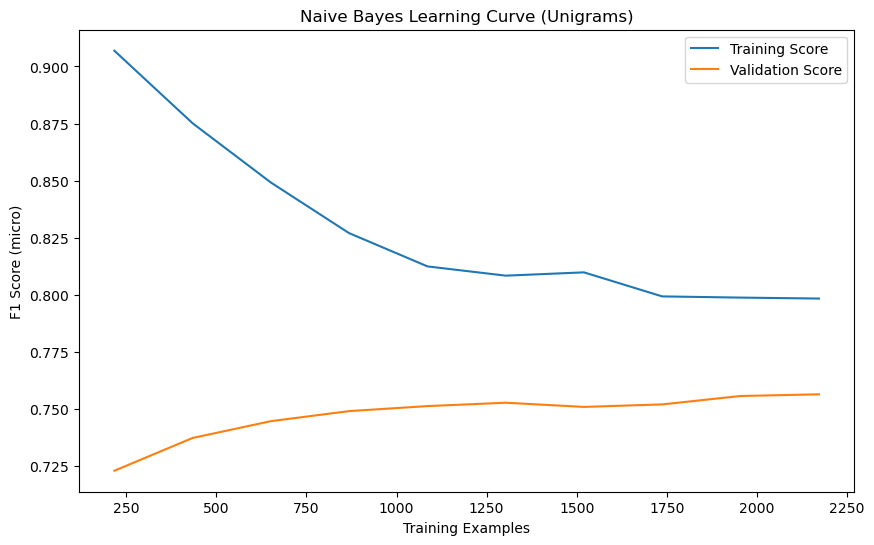

Classification Report for Uni-Bigrams (Validation Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.76      0.72      0.74       226
 Consult - History and Phy.       0.75      0.93      0.83       226
                 Orthopedic       0.79      0.82      0.81       226
                    Surgery       0.82      0.63      0.71       226

                   accuracy                           0.78       904
                  macro avg       0.78      0.78      0.77       904
               weighted avg       0.78      0.78      0.77       904

Classification Report for Uni-Bigrams (Test Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.78      0.69      0.73       222
 Consult - History and Phy.       0.74      0.96      0.83       222
                 Orthopedic       0.77      0.83      0.80       222
                    Surgery       0.82      0.60      0.69    

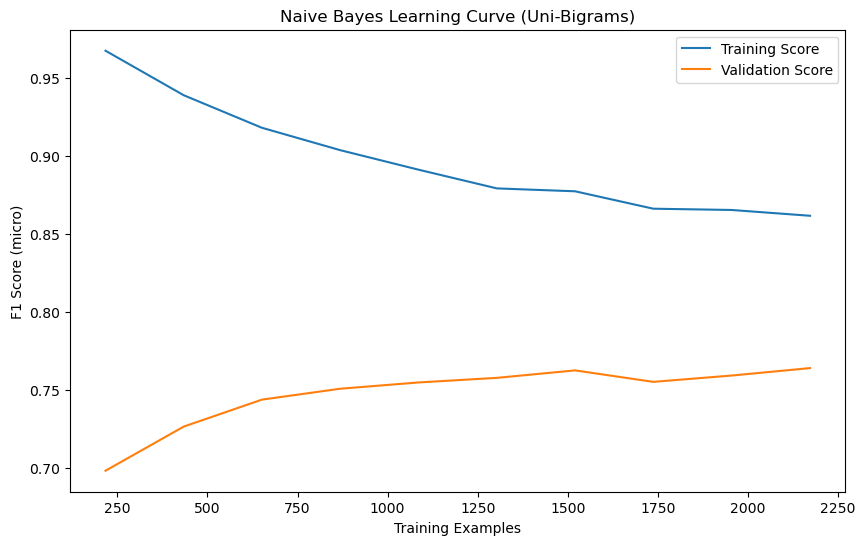

Classification Report for TF-IDF (Validation Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.80      0.62      0.70       226
 Consult - History and Phy.       0.68      0.98      0.81       226
                 Orthopedic       0.79      0.81      0.80       226
                    Surgery       0.85      0.64      0.73       226

                   accuracy                           0.76       904
                  macro avg       0.78      0.76      0.76       904
               weighted avg       0.78      0.76      0.76       904

Classification Report for TF-IDF (Test Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.79      0.57      0.66       222
 Consult - History and Phy.       0.68      0.96      0.79       222
                 Orthopedic       0.76      0.82      0.79       222
                    Surgery       0.81      0.63      0.71       222

  

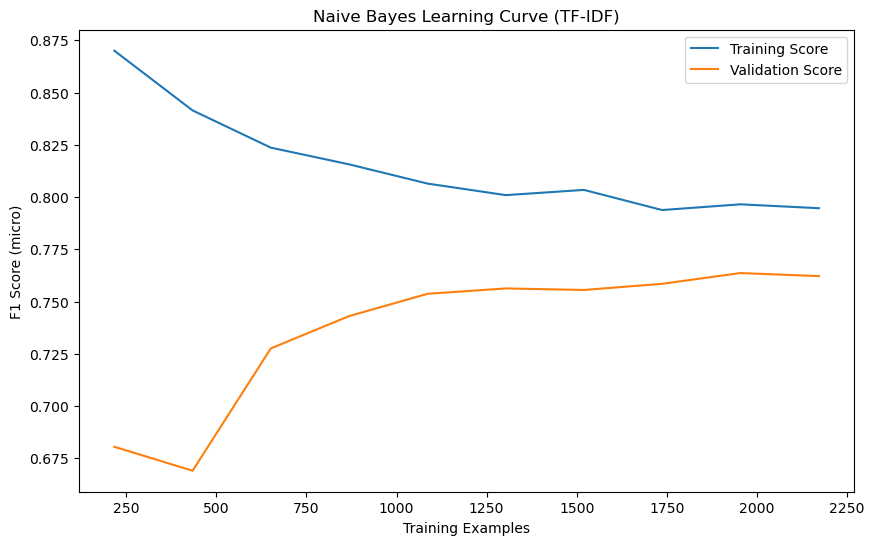

In [112]:
# Function to train and evaluate Naive Bayes
def train_and_evaluate_nb(X_train, y_train, X_val, y_val, X_test, y_test, text_representation):
    # Initialize Naive Bayes model
    model = MultinomialNB()

    # Train the model
    model.fit(X_train, y_train)

    # Predictions on validation set
    y_val_pred = model.predict(X_val)

    # Print classification report for validation set
    print(f"Classification Report for {text_representation} (Validation Set):")
    print(classification_report(y_val, y_val_pred, zero_division=1))

    # Predictions on test set
    y_test_pred = model.predict(X_test)

    # Print classification report for test set
    print(f"Classification Report for {text_representation} (Test Set):")
    print(classification_report(y_test, y_test_pred, zero_division=1))

    # Plot learning curve
    plot_nb_learning_curve(model, X_train, y_train, text_representation)

def plot_nb_learning_curve(estimator, X, y, text_representation):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='f1_micro', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
    plt.title(f'Naive Bayes Learning Curve ({text_representation})')
    plt.xlabel('Training Examples')
    plt.ylabel('F1 Score (micro)')
    plt.legend()
    plt.show()

# Train and evaluate Naive Bayes with Unigrams (1, 1)
train_and_evaluate_nb(X_unigrams_train, y_unigrams_train, X_unigrams_val, y_unigrams_val, X_unigrams_test, y_unigrams_test, "Unigrams")

# Train and evaluate Naive Bayes with n-gram (1, 2)
train_and_evaluate_nb(X_uni_bigrams_train, y_uni_bigrams_train, X_uni_bigrams_val, y_uni_bigrams_val, X_uni_bigrams_test, y_uni_bigrams_test, "Uni-Bigrams")

# Train and evaluate Naive Bayes with TfidfVectorizer
train_and_evaluate_nb(X_tfidf_train, y_tfidf_train, X_tfidf_val, y_tfidf_val, X_tfidf_test, y_tfidf_test, "TF-IDF")


>**2. Support Vector Machine (SVM)**<a class="anchor" id="3.2"></a>

Classification Report for Unigrams (Validation Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.73      0.78      0.76       226
 Consult - History and Phy.       0.78      0.85      0.81       226
                 Orthopedic       0.75      0.78      0.77       226
                    Surgery       0.80      0.64      0.71       226

                   accuracy                           0.76       904
                  macro avg       0.77      0.76      0.76       904
               weighted avg       0.77      0.76      0.76       904

Classification Report for Unigrams (Test Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.74      0.76      0.75       222
 Consult - History and Phy.       0.78      0.88      0.83       222
                 Orthopedic       0.76      0.82      0.79       222
                    Surgery       0.79      0.61      0.69       222

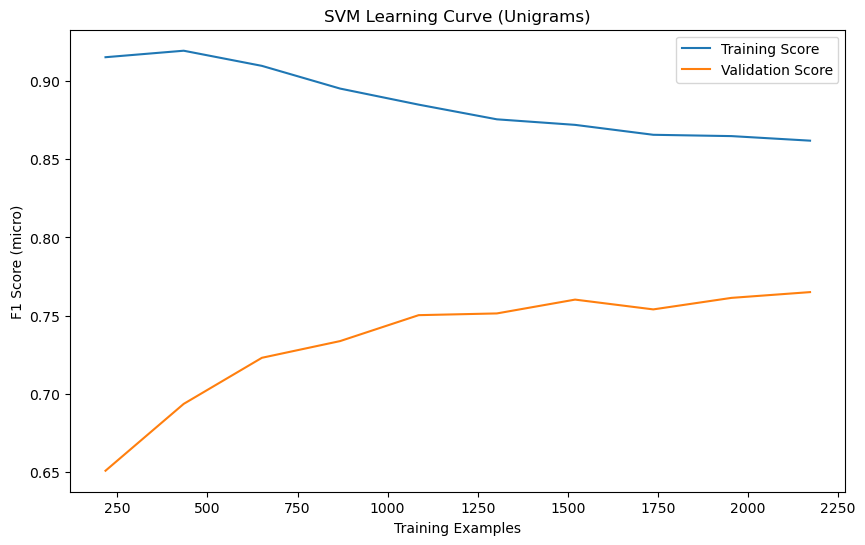

Classification Report for Uni-Bigrams (Validation Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.76      0.76      0.76       226
 Consult - History and Phy.       0.79      0.86      0.82       226
                 Orthopedic       0.76      0.77      0.76       226
                    Surgery       0.73      0.65      0.68       226

                   accuracy                           0.76       904
                  macro avg       0.76      0.76      0.76       904
               weighted avg       0.76      0.76      0.76       904

Classification Report for Uni-Bigrams (Test Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.77      0.74      0.76       222
 Consult - History and Phy.       0.78      0.89      0.83       222
                 Orthopedic       0.75      0.80      0.78       222
                    Surgery       0.73      0.61      0.66    

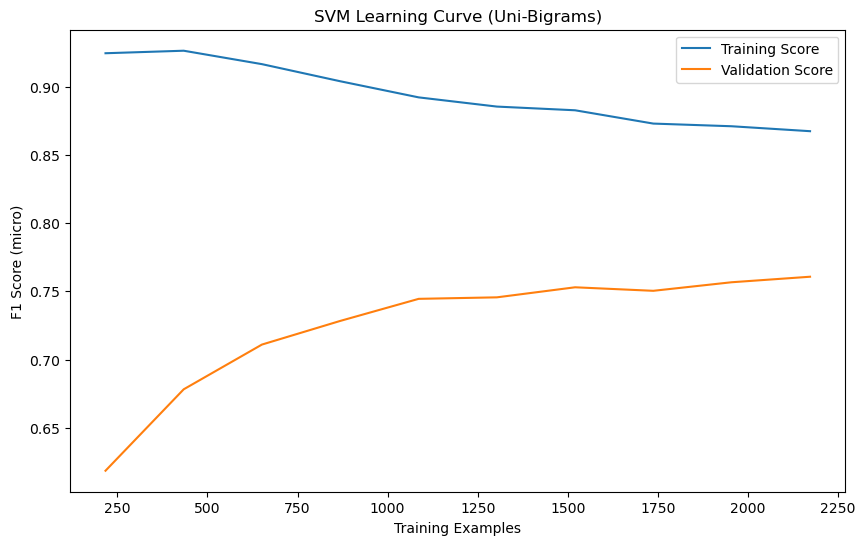

Classification Report for TF-IDF (Validation Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.76      0.81      0.79       226
 Consult - History and Phy.       0.81      0.87      0.84       226
                 Orthopedic       0.78      0.85      0.81       226
                    Surgery       0.83      0.63      0.72       226

                   accuracy                           0.79       904
                  macro avg       0.79      0.79      0.79       904
               weighted avg       0.79      0.79      0.79       904

Classification Report for TF-IDF (Test Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.79      0.81      0.80       222
 Consult - History and Phy.       0.81      0.90      0.85       222
                 Orthopedic       0.76      0.86      0.81       222
                    Surgery       0.84      0.60      0.70       222

  

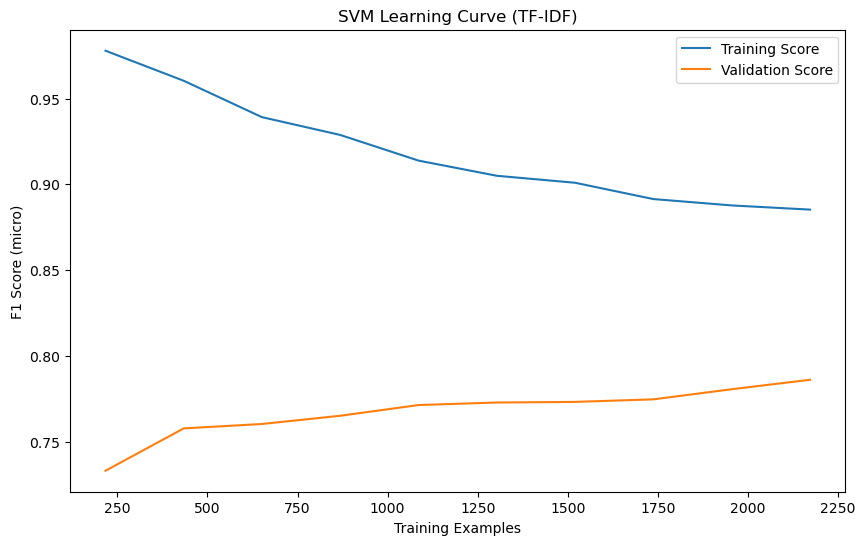

In [113]:
# Function to train and evaluate SVM
def train_and_evaluate_svm(X_train, y_train, X_val, y_val, X_test, y_test, text_representation):
    # Initialize SVM model
    model = SVC(class_weight='balanced')

    # Train the model
    model.fit(X_train, y_train)

    # Predictions on validation set
    y_val_pred = model.predict(X_val)

    # Print classification report for validation set
    print(f"Classification Report for {text_representation} (Validation Set):")
    print(classification_report(y_val, y_val_pred))

    # Predictions on test set
    y_test_pred = model.predict(X_test)

    # Print classification report for test set
    print(f"Classification Report for {text_representation} (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Plot learning curve
    plot_svm_learning_curve(model, X_train, y_train, text_representation)

def plot_svm_learning_curve(estimator, X, y, text_representation):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='f1_micro', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
    plt.title(f'SVM Learning Curve ({text_representation})')
    plt.xlabel('Training Examples')
    plt.ylabel('F1 Score (micro)')
    plt.legend()
    plt.show()

# Example usage for SVM
# Train and evaluate SVM with Unigrams (1, 1)
train_and_evaluate_svm(X_unigrams_train, y_unigrams_train, X_unigrams_val, y_unigrams_val, X_unigrams_test, y_unigrams_test, "Unigrams")

# Train and evaluate SVM with n-gram (1, 2)
train_and_evaluate_svm(X_uni_bigrams_train, y_uni_bigrams_train, X_uni_bigrams_val, y_uni_bigrams_val, X_uni_bigrams_test, y_uni_bigrams_test, "Uni-Bigrams")

# Train and evaluate SVM with TfidfVectorizer
train_and_evaluate_svm(X_tfidf_train, y_tfidf_train, X_tfidf_val, y_tfidf_val, X_tfidf_test, y_tfidf_test, "TF-IDF")

>**3. Logistic Regression**<a class="anchor" id="3.3"></a>

Classification Report for Unigrams (Validation Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.73      0.77      0.75       226
 Consult - History and Phy.       0.81      0.85      0.83       226
                 Orthopedic       0.76      0.75      0.75       226
                    Surgery       0.69      0.63      0.66       226

                   accuracy                           0.75       904
                  macro avg       0.75      0.75      0.75       904
               weighted avg       0.75      0.75      0.75       904

Classification Report for Unigrams (Test Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.76      0.78      0.77       222
 Consult - History and Phy.       0.83      0.86      0.84       222
                 Orthopedic       0.74      0.80      0.77       222
                    Surgery       0.71      0.62      0.66       222

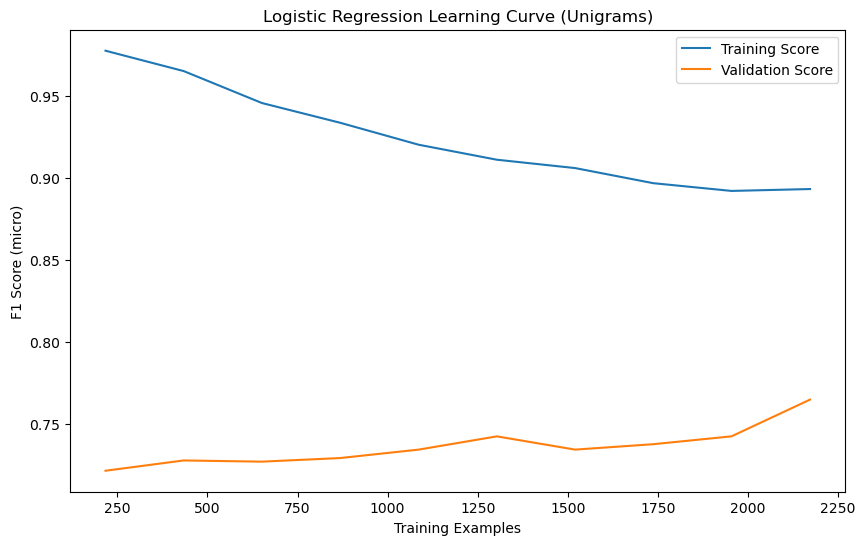

Classification Report for Uni-Bigrams (Validation Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.75      0.77      0.76       226
 Consult - History and Phy.       0.81      0.86      0.84       226
                 Orthopedic       0.76      0.74      0.75       226
                    Surgery       0.69      0.64      0.67       226

                   accuracy                           0.76       904
                  macro avg       0.75      0.76      0.75       904
               weighted avg       0.75      0.76      0.75       904

Classification Report for Uni-Bigrams (Test Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.76      0.77      0.77       222
 Consult - History and Phy.       0.82      0.86      0.84       222
                 Orthopedic       0.74      0.79      0.77       222
                    Surgery       0.72      0.62      0.66    

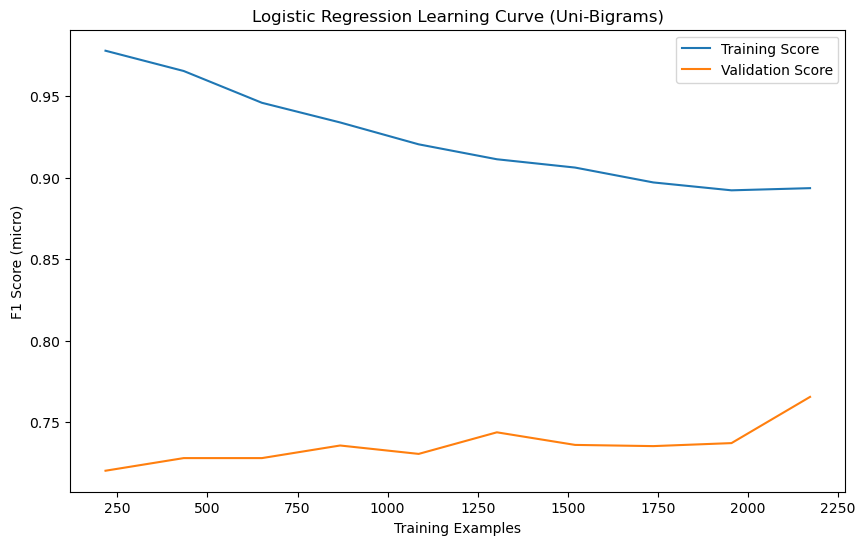

Classification Report for TF-IDF (Validation Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.78      0.80      0.79       226
 Consult - History and Phy.       0.79      0.89      0.84       226
                 Orthopedic       0.78      0.86      0.82       226
                    Surgery       0.85      0.64      0.73       226

                   accuracy                           0.80       904
                  macro avg       0.80      0.80      0.79       904
               weighted avg       0.80      0.80      0.79       904

Classification Report for TF-IDF (Test Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.79      0.77      0.78       222
 Consult - History and Phy.       0.78      0.90      0.84       222
                 Orthopedic       0.77      0.86      0.81       222
                    Surgery       0.83      0.62      0.71       222

  

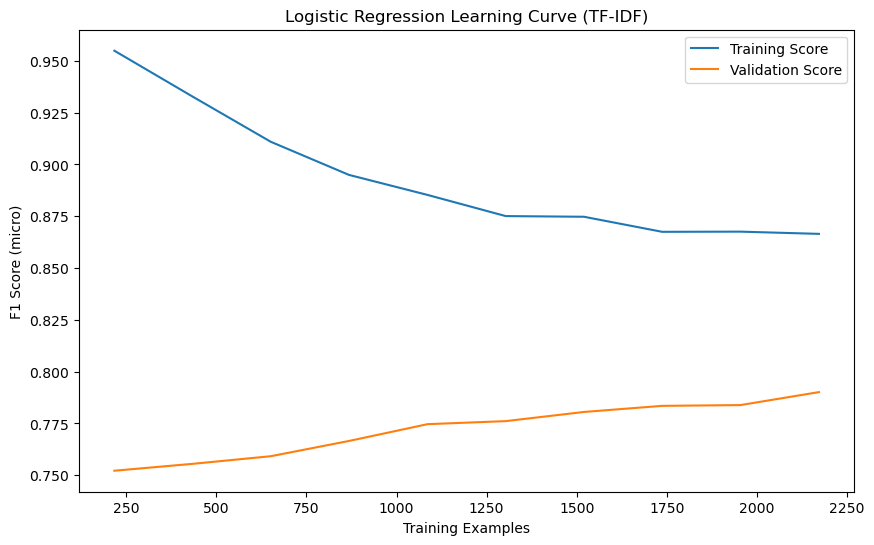

In [114]:
# Function to train and evaluate Logistic Regression
def train_and_evaluate_logistic_regression(X_train, y_train, X_val, y_val, X_test, y_test, text_representation):
    # Initialize Logistic Regression model
    model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000, n_jobs=-1)

    # Train the model
    model.fit(X_train, y_train)

    # Predictions on validation set
    y_val_pred = model.predict(X_val)

    # Print classification report for validation set
    print(f"Classification Report for {text_representation} (Validation Set):")
    print(classification_report(y_val, y_val_pred))

    # Predictions on test set
    y_test_pred = model.predict(X_test)

    # Print classification report for test set
    print(f"Classification Report for {text_representation} (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Plot learning curve
    plot_logistic_regression_learning_curve(model, X_train, y_train, text_representation)

def plot_logistic_regression_learning_curve(estimator, X, y, text_representation):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='f1_micro', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
    plt.title(f'Logistic Regression Learning Curve ({text_representation})')
    plt.xlabel('Training Examples')
    plt.ylabel('F1 Score (micro)')
    plt.legend()
    plt.show()

# Example usage for Logistic Regression
# Train and evaluate Logistic Regression with Unigrams (1, 1)
train_and_evaluate_logistic_regression(X_unigrams_train, y_unigrams_train, X_unigrams_val, y_unigrams_val, X_unigrams_test, y_unigrams_test, "Unigrams")

# Train and evaluate Logistic Regression with n-gram (1, 2)
train_and_evaluate_logistic_regression(X_uni_bigrams_train, y_uni_bigrams_train, X_uni_bigrams_val, y_uni_bigrams_val, X_uni_bigrams_test, y_uni_bigrams_test, "Uni-Bigrams")

# Train and evaluate Logistic Regression with TfidfVectorizer
train_and_evaluate_logistic_regression(X_tfidf_train, y_tfidf_train, X_tfidf_val, y_tfidf_val, X_tfidf_test, y_tfidf_test, "TF-IDF")

>**4. Decision Tree**<a class="anchor" id="3.4"></a>

Classification Report for Unigrams (Validation Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.71      0.85      0.77       226
 Consult - History and Phy.       0.81      0.85      0.83       226
                 Orthopedic       0.75      0.81      0.78       226
                    Surgery       0.79      0.54      0.65       226

                   accuracy                           0.76       904
                  macro avg       0.77      0.76      0.76       904
               weighted avg       0.77      0.76      0.76       904

Classification Report for Unigrams (Test Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.73      0.91      0.81       222
 Consult - History and Phy.       0.86      0.80      0.83       222
                 Orthopedic       0.72      0.88      0.79       222
                    Surgery       0.89      0.53      0.66       222

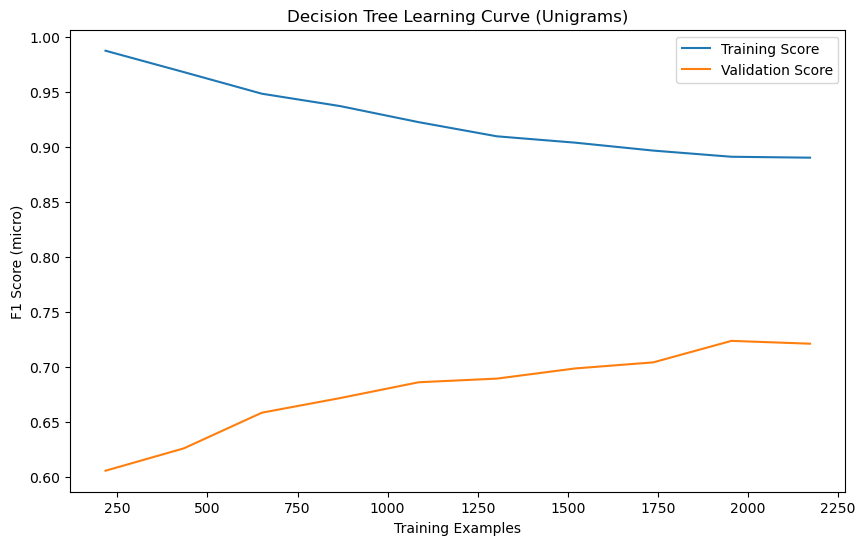

Classification Report for Uni-Bigrams (Validation Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.73      0.88      0.80       226
 Consult - History and Phy.       0.82      0.84      0.83       226
                 Orthopedic       0.75      0.82      0.78       226
                    Surgery       0.80      0.54      0.64       226

                   accuracy                           0.77       904
                  macro avg       0.77      0.77      0.76       904
               weighted avg       0.77      0.77      0.76       904

Classification Report for Uni-Bigrams (Test Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.75      0.91      0.82       222
 Consult - History and Phy.       0.86      0.81      0.83       222
                 Orthopedic       0.73      0.88      0.80       222
                    Surgery       0.87      0.55      0.67    

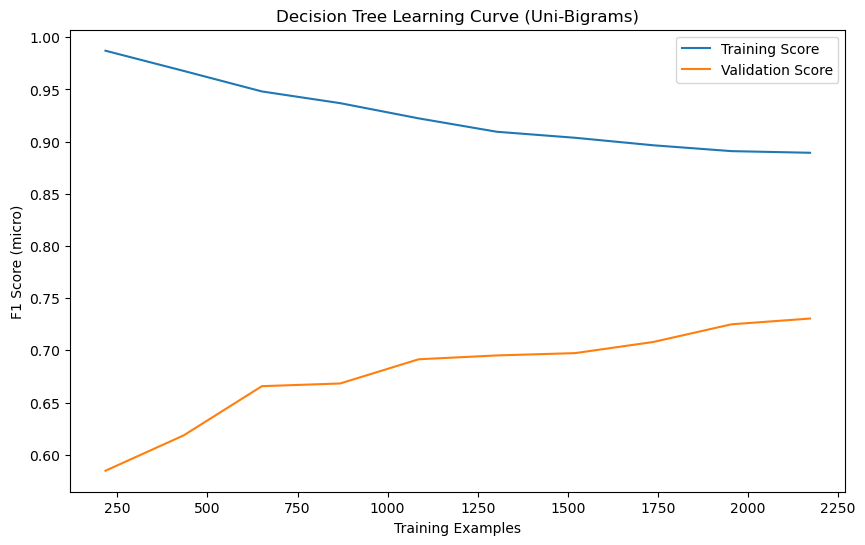

Classification Report for TF-IDF (Validation Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.72      0.85      0.78       226
 Consult - History and Phy.       0.83      0.82      0.82       226
                 Orthopedic       0.72      0.84      0.77       226
                    Surgery       0.82      0.53      0.64       226

                   accuracy                           0.76       904
                  macro avg       0.77      0.76      0.76       904
               weighted avg       0.77      0.76      0.76       904

Classification Report for TF-IDF (Test Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.72      0.91      0.80       222
 Consult - History and Phy.       0.86      0.79      0.82       222
                 Orthopedic       0.72      0.89      0.80       222
                    Surgery       0.89      0.51      0.65       222

  

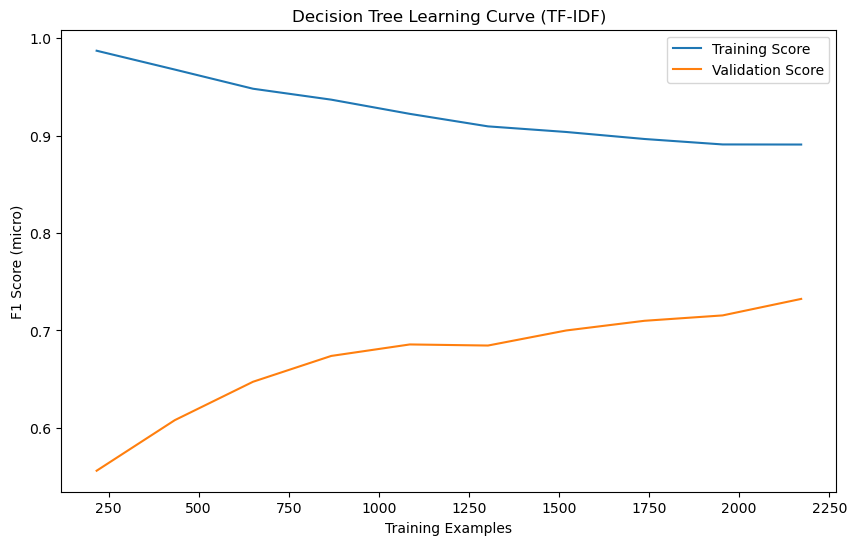

In [51]:
# Function to train and evaluate Decision Tree
def train_and_evaluate_decision_tree(X_train, y_train, X_val, y_val, X_test, y_test, text_representation):
    # Initialize Decision Tree model
    model = DecisionTreeClassifier(random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predictions on validation set
    y_val_pred = model.predict(X_val)

    # Print classification report for validation set
    print(f"Classification Report for {text_representation} (Validation Set):")
    print(classification_report(y_val, y_val_pred))

    # Predictions on test set
    y_test_pred = model.predict(X_test)

    # Print classification report for test set
    print(f"Classification Report for {text_representation} (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Plot learning curve
    plot_decision_tree_learning_curve(model, X_train, y_train, text_representation)

def plot_decision_tree_learning_curve(estimator, X, y, text_representation):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='f1_micro', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
    plt.title(f'Decision Tree Learning Curve ({text_representation})')
    plt.xlabel('Training Examples')
    plt.ylabel('F1 Score (micro)')
    plt.legend()
    plt.show()

# Example usage for Decision Tree
# Train and evaluate Decision Tree with Unigrams (1, 1)
train_and_evaluate_decision_tree(X_unigrams_train, y_unigrams_train, X_unigrams_val, y_unigrams_val, X_unigrams_test, y_unigrams_test, "Unigrams")

# Train and evaluate Decision Tree with n-gram (1, 2)
train_and_evaluate_decision_tree(X_uni_bigrams_train, y_uni_bigrams_train, X_uni_bigrams_val, y_uni_bigrams_val, X_uni_bigrams_test, y_uni_bigrams_test, "Uni-Bigrams")

# Train and evaluate Decision Tree with TfidfVectorizer
train_and_evaluate_decision_tree(X_tfidf_train, y_tfidf_train, X_tfidf_val, y_tfidf_val, X_tfidf_test, y_tfidf_test, "TF-IDF")

>**5. LightGBM**<a class="anchor" id="3.5"></a>

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18359
[LightGBM] [Info] Number of data points in the train set: 2716, number of used features: 4073
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
Classification Report for Unigrams (Validation Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.75      0.79      0.77       226
 Consult - History and Phy.       0.83      0.90      0.86       226
                 Orthopedic       0.77      0.78      0.78       226
                    Surgery       0.72      0.62      0.67       226

                   accuracy  

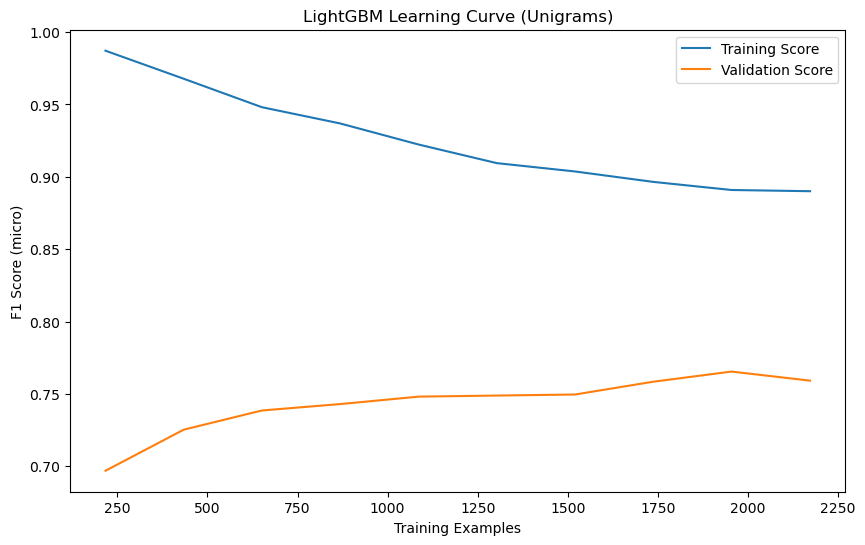

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.163929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27615
[LightGBM] [Info] Number of data points in the train set: 2716, number of used features: 7070
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
Classification Report for Uni-Bigrams (Validation Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.77      0.78      0.77       226
 Consult - History and Phy.       0.80      0.88      0.84       226
                 Orthopedic       0.76      0.77      0.76       226
                    Surgery       0.73      0.63      0.67       226

                   accuracy                           0.77       904
                  mac

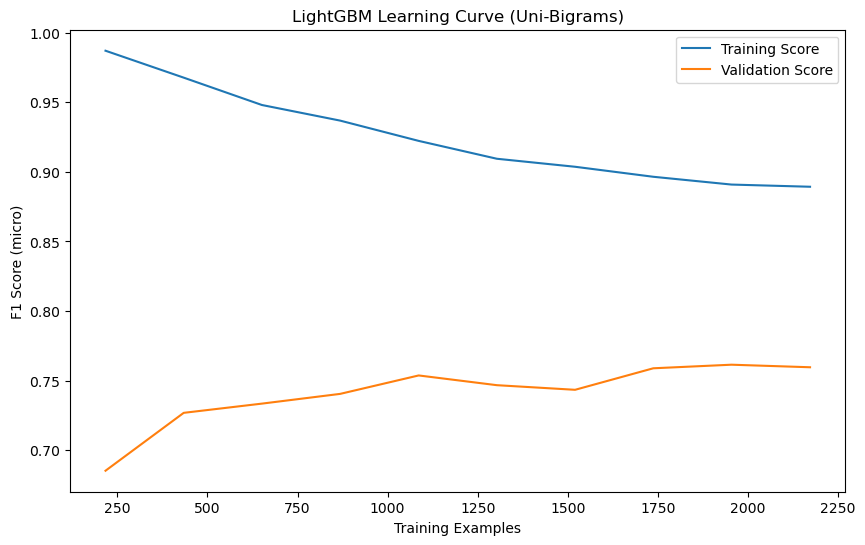

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 122371
[LightGBM] [Info] Number of data points in the train set: 2716, number of used features: 3896
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
Classification Report for TF-IDF (Validation Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.78      0.83      0.80       226
 Consult - History and Phy.       0.85      0.89      0.87       226
                 Orthopedic       0.78      0.82      0.80       226
                    Surgery       0.77      0.63      0.69       226

                   accuracy                           0.79       904
                  macro a

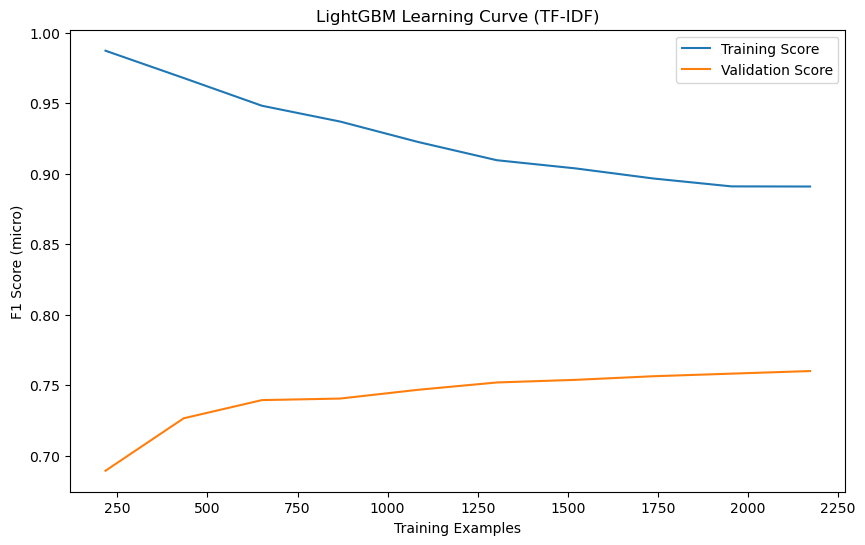

In [66]:
# Function to train and evaluate LightGBM
def train_and_evaluate_lightgbm(X_train, y_train, X_val, y_val, X_test, y_test, text_representation):
    # Convert input data to float32
    X_train = X_train.astype('float32')
    X_val = X_val.astype('float32')
    X_test = X_test.astype('float32')

    # Initialize LightGBM model
    model = lgb.LGBMClassifier(random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predictions on validation set
    y_val_pred = model.predict(X_val)

    # Print classification report for validation set
    print(f"Classification Report for {text_representation} (Validation Set):")
    print(classification_report(y_val, y_val_pred))

    # Predictions on test set
    y_test_pred = model.predict(X_test)

    # Print classification report for test set
    print(f"Classification Report for {text_representation} (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Plot learning curve
    plot_lightgbm_learning_curve(model, X_train, y_train, text_representation)


def plot_lightgbm_learning_curve(estimator, X, y, text_representation):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='f1_micro', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
    plt.title(f'LightGBM Learning Curve ({text_representation})')
    plt.xlabel('Training Examples')
    plt.ylabel('F1 Score (micro)')
    plt.legend()
    plt.show()

# Example usage for LightGBM
# Train and evaluate LightGBM with Unigrams (1, 1)
train_and_evaluate_lightgbm(X_unigrams_train, y_unigrams_train, X_unigrams_val, y_unigrams_val, X_unigrams_test, y_unigrams_test, "Unigrams")

# Train and evaluate LightGBM with n-gram (1, 2)
train_and_evaluate_lightgbm(X_uni_bigrams_train, y_uni_bigrams_train, X_uni_bigrams_val, y_uni_bigrams_val, X_uni_bigrams_test, y_uni_bigrams_test, "Uni-Bigrams")

# Train and evaluate LightGBM with TfidfVectorizer
train_and_evaluate_lightgbm(X_tfidf_train, y_tfidf_train, X_tfidf_val, y_tfidf_val, X_tfidf_test, y_tfidf_test, "TF-IDF")

Here is an overview of the result for easy viewing

|  | Unigrams | Uni-Bigrams | TF-IDF |
| ---------|----------|----------|---------|
| Naives Bayes (VAL) | 0.75 | 0.78 | 0.76 |
| Naives Bayes (TEST) | 0.74 | 0.77 | 0.75 |
| ---------|----------|----------|---------|
| SVM (VAL) | 0.76 | 0.76 | 0.79 |
| SVM (TEST) | 0.77 | 0.76 | 0.79 |
| ---------|----------|----------|---------|
| Logistic Regression (VAL) | 0.75 | 0.76 | 0.80 |
| Logistic Regression (TEST)| 0.76 | 076 | 0.79 |
| ---------|----------|----------|---------|
| Decision Tree (VAL) | 0.76 | 0.77 | 0.76 |
| Decision Tree (TEST)| 0.78| 0.79 | 0.78 |
| ---------|----------|----------|---------|
| LightGBM (VAL) | 0.77 | 0.77 | 0.79 |
| LightGBM (TEST)| 0.79 | 0.79 | 0.79 |

In general, all the models demonstrate solid performance, achieving accuracy rates ranging from 74% to 80%. 

Notably, TF-IDF and Uni-Bigrams consistently emerge as the most effective vectorization methods, outperforming Unigrams, which exhibit slightly weaker performance. 

Notably, among the models, lightGBM stands out as the top-performing one across the board.

Taking these factors into consideration, I've opted to conduct hyperparameter tuning across all algorithms, focusing specifically on the best-performing vectorization method within each algorithm.

## <font color= grey>Hyper-parameter Tuning<a class="anchor" id="4.0"></a>

>**Optuna**<a class="anchor" id="4.1"></a>

For Hyper-parameter tuning, I have chosen to use optuna.Choosing Optuna for hyperparameter tuning over traditional methods like GridSearch and Random Search can offer several advantages:<br>

1. **Efficiency and Speed:** <br>Optuna employs an intelligent search strategy, exploring the hyperparameter space more efficiently than traditional methods. It dynamically allocates more trials to promising hyperparameter configurations, which can lead to faster convergence and better results.<br><br>

2. **Dynamic Hyperparameter Ranges:**<br> Optuna allows you to define dynamic ranges for hyperparameters, adjusting the search space during optimization based on the progress of the trials. This adaptability can be crucial for finding optimal values in complex optimization landscapes.<br><br>

3. **Adaptive Search:**<br> Optuna adapts its search strategy based on the outcomes of past trials. It uses information from completed trials to guide the search towards promising regions of the hyperparameter space, making it more likely to find optimal configurations.

In [78]:
def plot_learning_curve(estimator, X_train, y_train, text_representation):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
    plt.title(f'Learning Curve ({text_representation})')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

>**1. Naive Bayes**<a class="anchor" id="4.2"></a>

[I 2023-12-15 05:12:47,509] A new study created in memory with name: no-name-8ebe8ca7-59fe-4f1e-b58c-0c7c7a66202a
[I 2023-12-15 05:12:47,663] Trial 0 finished with value: 0.7831858407079646 and parameters: {'alpha': 8.80197059472368e-06}. Best is trial 0 with value: 0.7831858407079646.
[I 2023-12-15 05:12:47,777] Trial 1 finished with value: 0.7831858407079646 and parameters: {'alpha': 6.282988776085003e-08}. Best is trial 0 with value: 0.7831858407079646.
[I 2023-12-15 05:12:47,883] Trial 2 finished with value: 0.7831858407079646 and parameters: {'alpha': 0.001871397840219632}. Best is trial 0 with value: 0.7831858407079646.
[I 2023-12-15 05:12:47,994] Trial 3 finished with value: 0.7831858407079646 and parameters: {'alpha': 0.00048134292261171966}. Best is trial 0 with value: 0.7831858407079646.
[I 2023-12-15 05:12:48,113] Trial 4 finished with value: 0.7831858407079646 and parameters: {'alpha': 1.4690809798274322e-10}. Best is trial 0 with value: 0.7831858407079646.
[I 2023-12-15 05

[I 2023-12-15 05:12:52,730] Trial 47 finished with value: 0.7831858407079646 and parameters: {'alpha': 0.003300993490583197}. Best is trial 10 with value: 0.7853982300884956.
[I 2023-12-15 05:12:52,818] Trial 48 finished with value: 0.7853982300884956 and parameters: {'alpha': 0.011834872048105323}. Best is trial 10 with value: 0.7853982300884956.
[I 2023-12-15 05:12:52,908] Trial 49 finished with value: 0.7831858407079646 and parameters: {'alpha': 0.0010777413473441726}. Best is trial 10 with value: 0.7853982300884956.
[I 2023-12-15 05:12:53,007] Trial 50 finished with value: 0.7842920353982301 and parameters: {'alpha': 0.08103237632212124}. Best is trial 10 with value: 0.7853982300884956.
[I 2023-12-15 05:12:53,122] Trial 51 finished with value: 0.7853982300884956 and parameters: {'alpha': 0.03264171981598968}. Best is trial 10 with value: 0.7853982300884956.
[I 2023-12-15 05:12:53,224] Trial 52 finished with value: 0.7853982300884956 and parameters: {'alpha': 0.02090183732497397}. B

[I 2023-12-15 05:12:57,090] Trial 94 finished with value: 0.7853982300884956 and parameters: {'alpha': 0.06335789810830225}. Best is trial 10 with value: 0.7853982300884956.
[I 2023-12-15 05:12:57,184] Trial 95 finished with value: 0.7831858407079646 and parameters: {'alpha': 0.0030394939206905814}. Best is trial 10 with value: 0.7853982300884956.
[I 2023-12-15 05:12:57,276] Trial 96 finished with value: 0.7853982300884956 and parameters: {'alpha': 0.021976863380111265}. Best is trial 10 with value: 0.7853982300884956.
[I 2023-12-15 05:12:57,404] Trial 97 finished with value: 0.7853982300884956 and parameters: {'alpha': 0.03876914143793553}. Best is trial 10 with value: 0.7853982300884956.
[I 2023-12-15 05:12:57,514] Trial 98 finished with value: 0.7831858407079646 and parameters: {'alpha': 0.006728844474243152}. Best is trial 10 with value: 0.7853982300884956.
[I 2023-12-15 05:12:57,620] Trial 99 finished with value: 0.7853982300884956 and parameters: {'alpha': 0.0690078063638402}. Be

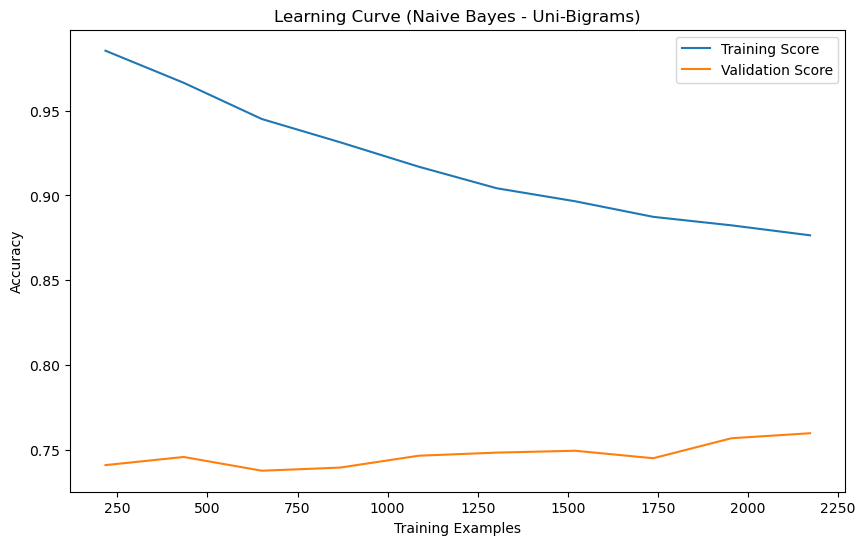

In [81]:
def objective(trial, X_train, X_val, X_test, y_train, y_val, y_test):
    alpha = trial.suggest_float('alpha', 1e-10, 1e-1, log=True)

    classifier = MultinomialNB(alpha=alpha)

    classifier.fit(X_train, y_train)
    y_pred_val = classifier.predict(X_val)

    # Calculate F1 score (you can choose other metrics as well)
    f1 = f1_score(y_val, y_pred_val, average='micro')

    # Return F1 score as the objective to be maximized
    return f1

# Optimize with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective(trial, X_uni_bigrams_train, X_uni_bigrams_val, X_uni_bigrams_test, y_uni_bigrams_train, y_uni_bigrams_val, y_uni_bigrams_test), n_trials=100)

# Get the best parameters
best_params = study.best_trial.params

# Create and fit your Naive Bayes classifier with the best parameters
best_classifier = MultinomialNB(**best_params)
best_classifier.fit(X_uni_bigrams_train, y_uni_bigrams_train)

# Plot the learning curve
plot_learning_curve(best_classifier, X_uni_bigrams_train, y_uni_bigrams_train, "Naive Bayes - Uni-Bigrams")

>**2. SVM**<a class="anchor" id="4.3"></a>

[I 2023-12-15 05:13:00,095] A new study created in memory with name: no-name-7737a5b4-f2d1-497c-a2b2-486aaabc2a87
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3910681496.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
[I 2023-12-15 05:13:13,757] Trial 0 finished with value: 0.8141592920353983 and parameters: {'C': 6.368733843050672, 'kernel': 'sigmoid'}. Best is trial 0 with value: 0.8141592920353983.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3910681496.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
[I 2023-12-15 05:13:37,564] Trial 1 finished with value: 0.8185

[I 2023-12-15 05:19:42,505] Trial 16 finished with value: 0.8053097345132744 and parameters: {'C': 0.13996285322523805, 'kernel': 'linear'}. Best is trial 2 with value: 0.8296460176991151.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3910681496.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
[I 2023-12-15 05:19:57,977] Trial 17 finished with value: 0.820796460176991 and parameters: {'C': 1.6888255739109896, 'kernel': 'linear'}. Best is trial 2 with value: 0.8296460176991151.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3910681496.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',

C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3910681496.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
[I 2023-12-15 05:25:14,455] Trial 33 finished with value: 0.8329646017699115 and parameters: {'C': 0.7657647792326522, 'kernel': 'sigmoid'}. Best is trial 24 with value: 0.8373893805309734.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3910681496.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
[I 2023-12-15 05:25:34,873] Trial 34 finished with value: 0.8163716814159292 and parameters: {'C': 0.23144035947183134, 'kernel': 'sigmoid'}. Best is trial 24 with value: 0.8

[I 2023-12-15 05:30:14,885] Trial 49 finished with value: 0.8230088495575222 and parameters: {'C': 2.6618213752128845, 'kernel': 'sigmoid'}. Best is trial 24 with value: 0.8373893805309734.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3910681496.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
[I 2023-12-15 05:30:38,516] Trial 50 finished with value: 0.8108407079646017 and parameters: {'C': 0.1612614104626693, 'kernel': 'linear'}. Best is trial 24 with value: 0.8373893805309734.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3910681496.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('

C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3910681496.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
[I 2023-12-15 05:36:00,518] Trial 66 finished with value: 0.7798672566371682 and parameters: {'C': 0.09682486079594115, 'kernel': 'linear'}. Best is trial 24 with value: 0.8373893805309734.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3910681496.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
[I 2023-12-15 05:36:17,749] Trial 67 finished with value: 0.8373893805309734 and parameters: {'C': 0.6126438150858616, 'kernel': 'linear'}. Best is trial 24 with value: 0.837

[I 2023-12-15 05:40:56,036] Trial 82 finished with value: 0.831858407079646 and parameters: {'C': 0.4983393067778859, 'kernel': 'linear'}. Best is trial 24 with value: 0.8373893805309734.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3910681496.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
[I 2023-12-15 05:41:12,662] Trial 83 finished with value: 0.827433628318584 and parameters: {'C': 1.1567843250698342, 'kernel': 'linear'}. Best is trial 24 with value: 0.8373893805309734.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3910681496.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',

C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3910681496.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
[I 2023-12-15 05:46:15,355] Trial 99 finished with value: 0.8373893805309734 and parameters: {'C': 0.6182079153934852, 'kernel': 'linear'}. Best is trial 24 with value: 0.8373893805309734.


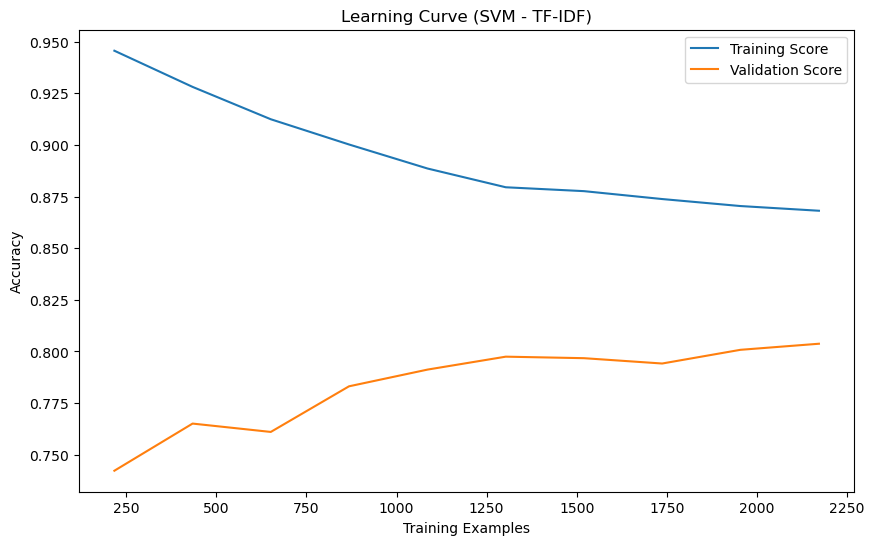

In [82]:
def objective(trial, X_train, X_val, X_test, y_train, y_val, y_test):
    C = trial.suggest_loguniform('C', 1e-2, 1e2)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

    classifier = SVC(C=C, kernel=kernel, class_weight='balanced')

    classifier.fit(X_train, y_train)
    y_pred_val = classifier.predict(X_val)

    # Calculate F1 score (you can choose other metrics as well)
    f1 = f1_score(y_val, y_pred_val, average='micro')

    # Return F1 score as the objective to be maximized
    return f1

# Optimize with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective(trial, X_tfidf_train, X_tfidf_val, X_tfidf_test, y_tfidf_train, y_tfidf_val, y_tfidf_test), n_trials=100)

# Get the best parameters
best_params = study.best_trial.params

# Create and fit your SVM classifier with the best parameters
best_classifier = SVC(**best_params, class_weight='balanced')
best_classifier.fit(X_tfidf_train, y_tfidf_train)

# Plot the learning curve
plot_learning_curve(best_classifier, X_tfidf_train, y_tfidf_train, "SVM - TF-IDF")

>**3. Logistic Regression**<a class="anchor" id="4.4"></a>

[I 2023-12-15 05:48:25,270] A new study created in memory with name: no-name-ed49e93d-6d1b-4992-b033-18c28f30ebe2
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3055548125.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
[I 2023-12-15 05:48:32,257] Trial 0 finished with value: 0.7953539823008849 and parameters: {'C': 35.67673031021025, 'penalty': 'l2'}. Best is trial 0 with value: 0.7953539823008849.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3055548125.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
C:\Users\manti\anaconda3\envs\NLP\lib\site-packages\sklearn\linear_

C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3055548125.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
[I 2023-12-15 05:49:34,339] Trial 13 finished with value: 0.8108407079646017 and parameters: {'C': 0.7023644905723142, 'penalty': 'l2'}. Best is trial 11 with value: 0.8174778761061947.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3055548125.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
[I 2023-12-15 05:49:37,669] Trial 14 finished with value: 0.8064159292035398 and parameters: {'C': 3.1354751664170544, 'penalty': 'l2'}. Best is trial 11 with value: 0.8174778761

[I 2023-12-15 05:50:34,128] Trial 27 finished with value: 0.8075221238938053 and parameters: {'C': 0.4315657013318434, 'penalty': 'l2'}. Best is trial 11 with value: 0.8174778761061947.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3055548125.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
[I 2023-12-15 05:50:36,246] Trial 28 finished with value: 0.7842920353982301 and parameters: {'C': 0.1606316309100182, 'penalty': 'l2'}. Best is trial 11 with value: 0.8174778761061947.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3055548125.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-

[I 2023-12-15 05:51:38,141] Trial 42 finished with value: 0.8141592920353983 and parameters: {'C': 1.142826128312052, 'penalty': 'l2'}. Best is trial 11 with value: 0.8174778761061947.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3055548125.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
[I 2023-12-15 05:51:41,579] Trial 43 finished with value: 0.8053097345132744 and parameters: {'C': 2.1146688560774964, 'penalty': 'l2'}. Best is trial 11 with value: 0.8174778761061947.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3055548125.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2

[I 2023-12-15 05:52:35,304] Trial 57 finished with value: 0.7721238938053098 and parameters: {'C': 0.3170792840888802, 'penalty': 'none'}. Best is trial 11 with value: 0.8174778761061947.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3055548125.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
[I 2023-12-15 05:52:40,180] Trial 58 finished with value: 0.7964601769911505 and parameters: {'C': 9.493217958820635, 'penalty': 'l2'}. Best is trial 11 with value: 0.8174778761061947.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3055548125.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e

[I 2023-12-15 05:53:31,087] Trial 73 finished with value: 0.8174778761061947 and parameters: {'C': 1.2629816183667981, 'penalty': 'l2'}. Best is trial 11 with value: 0.8174778761061947.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3055548125.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
[I 2023-12-15 05:53:33,813] Trial 74 finished with value: 0.8097345132743363 and parameters: {'C': 0.6836572034898245, 'penalty': 'l2'}. Best is trial 11 with value: 0.8174778761061947.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3055548125.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-

[I 2023-12-15 05:54:24,699] Trial 89 finished with value: 0.8053097345132744 and parameters: {'C': 2.4509888786679426, 'penalty': 'l2'}. Best is trial 11 with value: 0.8174778761061947.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3055548125.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
[I 2023-12-15 05:54:27,003] Trial 90 finished with value: 0.7920353982300885 and parameters: {'C': 0.22592329557389823, 'penalty': 'l2'}. Best is trial 11 with value: 0.8174778761061947.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\3055548125.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e

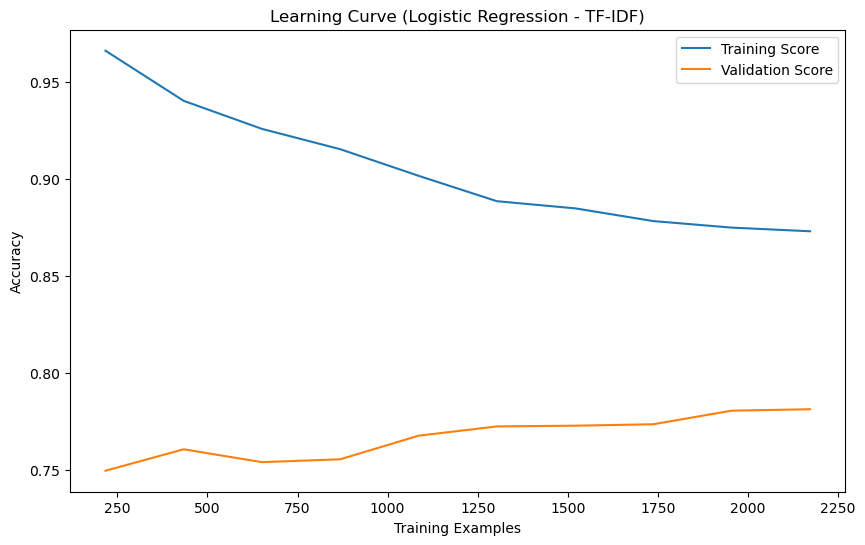

In [83]:
def objective(trial, X_train, X_val, X_test, y_train, y_val, y_test):
    C = trial.suggest_loguniform('C', 1e-2, 1e2)
    penalty = trial.suggest_categorical('penalty', ['none','l2'])

    classifier = LogisticRegression(C=C, penalty=penalty, class_weight='balanced', random_state=42, max_iter=1000, n_jobs=-1)

    classifier.fit(X_train, y_train)
    y_pred_val = classifier.predict(X_val)

    # Calculate F1 score (you can choose other metrics as well)
    f1 = f1_score(y_val, y_pred_val, average='micro')

    # Return F1 score as the objective to be maximized
    return f1

# Optimize with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective(trial, X_tfidf_train, X_tfidf_val, X_tfidf_test, y_tfidf_train, y_tfidf_val, y_tfidf_test), n_trials=100)

# Get the best parameters
best_params = study.best_trial.params

# Create and fit your Logistic Regression classifier with the best parameters
best_classifier = LogisticRegression(**best_params, class_weight='balanced', random_state=42, max_iter=1000, n_jobs=-1)
best_classifier.fit(X_tfidf_train, y_tfidf_train)

# Plot the learning curve
plot_learning_curve(best_classifier, X_tfidf_train, y_tfidf_train, "Logistic Regression - TF-IDF")

>**4. Decision Tree**<a class="anchor" id="4.5"></a>

[I 2023-12-15 05:55:24,888] A new study created in memory with name: no-name-99e30654-b75f-4f40-a5fe-9e0270ef16cb
[I 2023-12-15 05:55:34,289] Trial 0 finished with value: 0.6946902654867256 and parameters: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.6946902654867256.
[I 2023-12-15 05:55:41,290] Trial 1 finished with value: 0.6858407079646017 and parameters: {'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.6946902654867256.
[I 2023-12-15 05:55:56,302] Trial 2 finished with value: 0.7334070796460177 and parameters: {'max_depth': 19, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.7334070796460177.
[I 2023-12-15 05:56:02,173] Trial 3 finished with value: 0.6803097345132744 and parameters: {'max_depth': 6, 'min_samples_split': 18, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.7334070796460177.
[I 2023-12-15 05:56:11,033] Trial 4 finished with value: 0.693

[I 2023-12-15 06:03:50,144] Trial 39 finished with value: 0.7267699115044248 and parameters: {'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 38 with value: 0.756637168141593.
[I 2023-12-15 06:04:06,465] Trial 40 finished with value: 0.7356194690265485 and parameters: {'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 38 with value: 0.756637168141593.
[I 2023-12-15 06:04:24,702] Trial 41 finished with value: 0.756637168141593 and parameters: {'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 38 with value: 0.756637168141593.
[I 2023-12-15 06:04:46,506] Trial 42 finished with value: 0.756637168141593 and parameters: {'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 38 with value: 0.756637168141593.
[I 2023-12-15 06:05:07,476] Trial 43 finished with value: 0.7610619469026548 and parameters: {'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 4

[I 2023-12-15 06:15:26,494] Trial 79 finished with value: 0.756637168141593 and parameters: {'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 61 with value: 0.7676991150442478.
[I 2023-12-15 06:15:44,175] Trial 80 finished with value: 0.7610619469026548 and parameters: {'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 61 with value: 0.7676991150442478.
[I 2023-12-15 06:16:02,822] Trial 81 finished with value: 0.7676991150442478 and parameters: {'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 61 with value: 0.7676991150442478.
[I 2023-12-15 06:16:22,615] Trial 82 finished with value: 0.7676991150442478 and parameters: {'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 61 with value: 0.7676991150442478.
[I 2023-12-15 06:16:46,235] Trial 83 finished with value: 0.7676991150442478 and parameters: {'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is tr

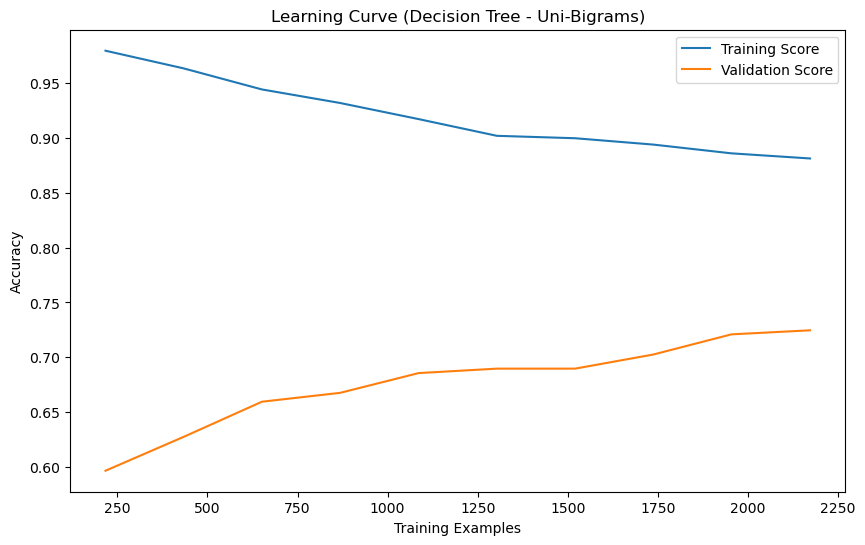

In [84]:
def objective(trial, X_train, X_val, X_test, y_train, y_val, y_test):
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    classifier = DecisionTreeClassifier(
        max_depth=max_depth, 
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    classifier.fit(X_train, y_train)
    y_pred_val = classifier.predict(X_val)

    # Calculate F1 score (you can choose other metrics as well)
    f1 = f1_score(y_val, y_pred_val, average='micro')

    # Return F1 score as the objective to be maximized
    return f1

# Optimize with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective(trial, X_uni_bigrams_train, X_uni_bigrams_val, X_uni_bigrams_test, y_uni_bigrams_train, y_uni_bigrams_val, y_uni_bigrams_test), n_trials=100)

# Get the best parameters
best_params = study.best_trial.params

# Create and fit your Decision Tree classifier with the best parameters
best_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_classifier.fit(X_uni_bigrams_train, y_uni_bigrams_train)

# Plot the learning curve
plot_learning_curve(best_classifier, X_uni_bigrams_train, y_uni_bigrams_train, "Decision Tree - Uni-Bigrams")

>**5. LightGBM**<a class="anchor" id="4.6"></a>

[I 2023-12-15 04:45:27,664] A new study created in memory with name: no-name-9fcad2a9-6e43-4b88-b26c-3c11c3deb579
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/release

[I 2023-12-15 04:46:41,388] Trial 6 finished with value: 0.7311946902654867 and parameters: {'num_leaves': 107, 'learning_rate': 0.0016459334110453434, 'feature_fraction': 0.7978965618436648, 'bagging_fraction': 0.20771139047160564, 'bagging_freq': 2, 'min_child_samples': 36}. Best is trial 0 with value: 0.790929203539823.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
C:

C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0)

[I 2023-12-15 04:48:19,463] Trial 19 finished with value: 0.7887168141592921 and parameters: {'num_leaves': 78, 'learning_rate': 0.006471960850657242, 'feature_fraction': 0.46659265998379357, 'bagging_fraction': 0.4980627535897941, 'bagging_freq': 1, 'min_child_samples': 21}. Best is trial 14 with value: 0.7986725663716814.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
C

C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0)

[I 2023-12-15 04:49:48,892] Trial 32 finished with value: 0.7920353982300885 and parameters: {'num_leaves': 82, 'learning_rate': 0.003659353611793033, 'feature_fraction': 0.17014490373494026, 'bagging_fraction': 0.9571829611589918, 'bagging_freq': 3, 'min_child_samples': 30}. Best is trial 14 with value: 0.7986725663716814.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
C

C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0)

[I 2023-12-15 04:52:00,594] Trial 45 finished with value: 0.7887168141592921 and parameters: {'num_leaves': 147, 'learning_rate': 0.016548339631960514, 'feature_fraction': 0.6855474935269336, 'bagging_fraction': 0.9191359245142804, 'bagging_freq': 2, 'min_child_samples': 26}. Best is trial 34 with value: 0.8053097345132744.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
C

C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0)

[I 2023-12-15 04:54:02,936] Trial 58 finished with value: 0.790929203539823 and parameters: {'num_leaves': 10, 'learning_rate': 0.02353172943425426, 'feature_fraction': 0.35365183896936037, 'bagging_fraction': 0.7539928929640177, 'bagging_freq': 3, 'min_child_samples': 39}. Best is trial 34 with value: 0.8053097345132744.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
C:\

C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0)

[I 2023-12-15 04:55:48,362] Trial 71 finished with value: 0.7942477876106194 and parameters: {'num_leaves': 17, 'learning_rate': 0.02496363182693535, 'feature_fraction': 0.5662298806576074, 'bagging_fraction': 0.4920290785540537, 'bagging_freq': 2, 'min_child_samples': 24}. Best is trial 34 with value: 0.8053097345132744.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
C:\

C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0)

[I 2023-12-15 04:58:13,478] Trial 84 finished with value: 0.8042035398230089 and parameters: {'num_leaves': 22, 'learning_rate': 0.0014476611582583472, 'feature_fraction': 0.4848118329762966, 'bagging_fraction': 0.9408731682307454, 'bagging_freq': 9, 'min_child_samples': 14}. Best is trial 34 with value: 0.8053097345132744.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
C

C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0)

[I 2023-12-15 05:02:43,608] Trial 97 finished with value: 0.8119469026548671 and parameters: {'num_leaves': 48, 'learning_rate': 0.0018647654441852149, 'feature_fraction': 0.6425258148274916, 'bagging_fraction': 0.9231018467146656, 'bagging_freq': 8, 'min_child_samples': 7}. Best is trial 97 with value: 0.8119469026548671.
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\manti\AppData\Local\Temp\ipykernel_6064\2899782441.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
C:

[LightGBM] [Warning] feature_fraction is set=0.6425258148274916, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6425258148274916
[LightGBM] [Warning] bagging_fraction is set=0.9231018467146656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9231018467146656
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.6425258148274916, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6425258148274916
[LightGBM] [Warning] bagging_fraction is set=0.9231018467146656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9231018467146656
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.097683 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

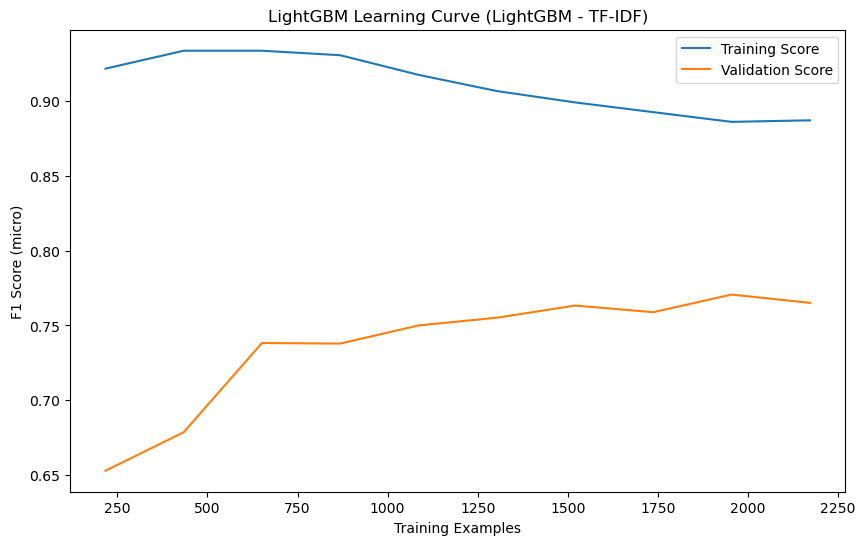

In [80]:
def objective(trial, X_train, X_val, X_test, y_train, y_val, y_test):
    params = {
        'objective': 'multiclass',  # Change to 'multiclass'
        'num_class': 4,  # Specify the number of classes
        'metric': 'multi_logloss',  # Change to a suitable multiclass metric
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 10, 200),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'random_state': 42,
        'verbose': -1
    }

    classifier = lgb.LGBMClassifier(**params)

    classifier.fit(X_train, y_train)
    y_pred_val = classifier.predict(X_val)

    # Calculate F1 score (you can choose other metrics as well)
    f1 = f1_score(y_val, y_pred_val, average='micro')

    # Return F1 score as the objective to be maximized
    return f1

# Optimize with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective(trial, X_tfidf_train, X_tfidf_val, X_tfidf_test, y_tfidf_train, y_tfidf_val, y_tfidf_test), n_trials=100)

# Get the best parameters
best_params = study.best_trial.params

# Create and fit your LightGBM classifier with the best parameters
best_classifier = lgb.LGBMClassifier(**best_params, random_state=42)
best_classifier.fit(X_tfidf_train, y_tfidf_train)

# Plot the learning curve
plot_lightgbm_learning_curve(best_classifier, X_tfidf_train, y_tfidf_train, "LightGBM - TF-IDF")


## <font color= grey> Final Result<a class="anchor" id="5.0"></a>

Here is an overview of the result for easy viewing

| Algorithmn & Vectorizor | Result after Tuning | Best Parameters |
| ------------ | ------------- | ----------------- |
| Naives Bayes (Uni-Bigrams) | 0.78 | {'alpha': 1.632524965013197e-09}|
| SVM (TF-IDF) | 0.84 | {'C': 3.688646184235634, 'kernel': 'sigmoid'} |
| Logistic Regression (TF-IDF) | 0.82 |{'C': 0.3813209544416437, 'penalty': 'l2'}|
| Decision Tree (Uni-Bigrmas) | 0.75 |{'max_depth': 19, 'min_samples_split': 13, 'min_samples_leaf': 6}|
| LightGBM (TF-IDF) | 0.81 | {'num_leaves': 49, 'learning_rate': 0.0014673250345329336, 'feature_fraction': 0.7186951655005094, 'bagging_fraction': 0.8410964446468672, 'bagging_freq': 8, 'min_child_samples': 7} |

The best model after hyper-parameter tuning, surprisingly different from our training previously, is Support Vector Machine with TF-IDF as its vectorizor. It achieves a F1 score of 84%, which is a 5% improvement.